In [1]:
# project: p5
# submitter: jchalem
# partner: none
# hours: 15

In [2]:
from zipfile import ZipFile, ZIP_DEFLATED
from io import TextIOWrapper
from bs4 import BeautifulSoup as BS
from graphviz import Digraph
from shapely.geometry import Polygon, box, Point
import csv, io, os, pandas as pd, edgar_utils as e, re, json, geopandas

In [3]:
#q1

df = pd.read_csv("server_log.zip", compression = "zip")

df["size"] = df["size"].astype(int)        
sum(df["size"])

24801002666

In [4]:
#q2

df.groupby('ip')['ip'].count().sort_values(ascending = False)[:10].to_dict()

{'54.152.17.ccg': 12562,
 '183.195.251.hah': 6524,
 '52.45.218.ihf': 5562,
 '68.180.231.abf': 5493,
 '204.212.175.bch': 4708,
 '103.238.106.gif': 4428,
 '208.77.215.jeh': 3903,
 '208.77.214.jeh': 3806,
 '217.174.255.dgd': 3551,
 '82.13.163.caf': 3527}

In [5]:
#q3

sum(df["code"]>400)/len(df)

0.03466852724527611

In [6]:
#q4
df["cik"] = df["cik"].astype(int)
df["file names"] = df["cik"].astype(str) + "/" + df["accession"] + "/" + df["extention"]
df.groupby('file names')['file names'].count().sort_values(ascending = False).first_valid_index()

'1627631/0001627631-15-000004/.txt'

In [7]:
#q5

len(df.loc[df['crawler'] == 1])

971

In [8]:
#q6

amount_ip = pd.DataFrame()
# Group all of the similar ip addresses by count, and add the ips to a dataframe.
amount_ip['ip'] = df.groupby('ip', sort = False)['ip'].count().index
# Add the counts to a dataframe.
amount_ip['counts'] = df.groupby('ip', sort = False)['ip'].count().tolist()
# Convert the ips to their location
amount_ip["ip"] = amount_ip["ip"].apply(e.lookup_region)
# Group the regions together and add their appearnces together
amount_region = amount_ip.groupby(by=["ip"], sort = False).sum()
# Sort the values by counts
amount_region = amount_region.sort_values(by=['counts'], ascending = False)
# Get the 0th index to get the country
amount_region.index[0]

'United States of America'

In [9]:
#q7

# Create boolean column, if the counts of the ip are greater than 1000
amount_ip["greater_than_1000"] = amount_ip["counts"] > 1000
# Group the similar regions together by means of each column
amount_ip_greater_1000 = amount_ip.groupby(by=["ip"],sort = False).mean()
# Convert this to a dictionary
amount_ip_greater_1000["greater_than_1000"].to_dict()

{'United States of America': 0.019862490450725745,
 'China': 0.006864988558352402,
 'Hong Kong': 0.0,
 'Ireland': 0.3125,
 'Canada': 0.017857142857142856,
 'United Kingdom of Great Britain and Northern Ireland': 0.06666666666666667,
 'Czechia': 0.0,
 'Germany': 0.0,
 'Bulgaria': 0.3333333333333333,
 'France': 0.0036900369003690036,
 'India': 0.058823529411764705,
 'Korea (Republic of)': 0.2,
 'Australia': 0.07692307692307693,
 'Spain': 0.0,
 'Netherlands': 0.0,
 'Sweden': 0.0,
 'Sudan': 0.0,
 'Estonia': 0.0,
 'Russian Federation': 0.0,
 'Tanzania, United Republic of': 0.0,
 'Yemen': 0.0,
 'Algeria': 0.0,
 'Ukraine': 0.0,
 'Slovakia': 0.0,
 'Viet Nam': 0.0,
 'Denmark': 0.0,
 'Singapore': 0.0,
 'Switzerland': 0.0,
 'Thailand': 0.0,
 'South Africa': 0.0,
 'Italy': 0.0,
 'Poland': 0.0,
 'Taiwan (Province of China)': 0.0,
 'Brazil': 0.0,
 'Morocco': 0.0,
 'Malaysia': 0.0,
 'Hungary': 0.0,
 'Japan': 0.0,
 'Luxembourg': 0.0,
 'Romania': 0.0,
 'Liberia': 0.0,
 'Israel': 0.0,
 'Bangladesh': 0.0

In [10]:
files = {}
#visited = []
with ZipFile("docs.zip") as zf:
    all_files = zf.namelist()
    for i in all_files:
        if not i.endswith("/"):
            with zf.open(i, "r") as f:
                #files[i] = e.Filing(f.read())
                files[i] = e.Filing(str(BS(f.read(), features = 'lxml')))

In [11]:
#q8

files["850693/0000850693-07-000159/-index.htm"].dates

['2007-07-25', '2007-07-25', '2007-07-23']

In [12]:
#q9

state_dictionary = {}
for i in files:
    states = files[i].state()
    #print(states)
    if states == None:
        continue
    #print(states)
    if states not in state_dictionary:
        state_dictionary[states] = 0
    state_dictionary[states] += 1
        
# Sorted dictionary through this website:
# https://stackoverflow.com/questions/20577840/python-dictionary-sorting-in-descending-order-based-on-values
dict(sorted(state_dictionary.items(), key=lambda x: x[1], reverse = True))

{'CA': 91,
 'NY': 83,
 'TX': 64,
 'MA': 30,
 'CO': 25,
 'IL': 25,
 'PA': 25,
 'NJ': 23,
 'FL': 21,
 'VA': 15,
 'MN': 15,
 'CT': 14,
 'MD': 13,
 'MI': 11,
 'OH': 10,
 'DE': 10,
 'NC': 9,
 'WI': 9,
 'GA': 8,
 'OK': 7,
 'OX': 6,
 'NV': 6,
 'IA': 6,
 'UT': 5,
 'KS': 5,
 'AZ': 5,
 'IN': 4,
 'TN': 4,
 'MO': 4,
 'WA': 3,
 'KY': 2,
 'NE': 2,
 'LA': 2,
 'OR': 2,
 'WV': 2,
 'MS': 1,
 'AL': 1,
 'SD': 1,
 'NM': 1,
 'AR': 1,
 'VT': 1,
 'ID': 1,
 'DC': 1,
 'ME': 1}

In [13]:
#q10

sic_dictionary = {}
for i in files:
    s = files[i].sic
    if not s == None:
        if s not in sic_dictionary:
            sic_dictionary[s] = 0
        sic_dictionary[s] += 1
        
# Sorted dictionary through this website:
# https://stackoverflow.com/questions/20577840/python-dictionary-sorting-in-descending-order-based-on-values     
dict(sorted(sic_dictionary.items(), key=lambda x: x[1], reverse = True))

{2834: 40,
 6022: 20,
 1311: 20,
 6798: 20,
 6021: 20,
 1389: 19,
 6189: 17,
 6211: 17,
 2836: 13,
 7389: 11,
 1000: 11,
 7372: 11,
 6029: 11,
 6331: 10,
 6199: 8,
 4911: 8,
 2860: 8,
 6282: 8,
 7370: 7,
 3841: 6,
 7371: 6,
 3674: 5,
 4931: 5,
 1700: 5,
 4522: 5,
 8742: 5,
 900: 5,
 3826: 5,
 7374: 4,
 2510: 4,
 6035: 4,
 4813: 4,
 3842: 4,
 3663: 4,
 5812: 4,
 3620: 3,
 6221: 3,
 3829: 3,
 6799: 3,
 3420: 3,
 3510: 3,
 8062: 3,
 1400: 3,
 3576: 3,
 2800: 3,
 7200: 3,
 7373: 3,
 8731: 2,
 1040: 2,
 2810: 2,
 3990: 2,
 5940: 2,
 1731: 2,
 6311: 2,
 8082: 2,
 6324: 2,
 6321: 2,
 3845: 2,
 1221: 2,
 3669: 2,
 5900: 2,
 5500: 2,
 4841: 2,
 8711: 2,
 5172: 2,
 1382: 2,
 7812: 2,
 4922: 2,
 3679: 2,
 3621: 2,
 5122: 2,
 3661: 2,
 3577: 2,
 6141: 2,
 3272: 2,
 3695: 2,
 3559: 2,
 3690: 2,
 2111: 2,
 3825: 2,
 1531: 2,
 2870: 2,
 4812: 2,
 5065: 2,
 7900: 2,
 5661: 2,
 4512: 2,
 7830: 2,
 3571: 1,
 7361: 1,
 3140: 1,
 6200: 1,
 7381: 1,
 4941: 1,
 5621: 1,
 7330: 1,
 8051: 1,
 3550: 1,
 2890: 

In [14]:
#q11

sic_dictionary = {}
for f in df["file names"]:
    if f not in files:
        continue
    s = files[f].sic
    if s == None:
        continue
    if s not in sic_dictionary:
        sic_dictionary[s] = 0
    sic_dictionary[s] += 1
dict(sorted(sic_dictionary.items(), key=lambda x: x[1], reverse = True))

{2834: 984,
 1389: 656,
 1311: 550,
 2836: 429,
 6022: 379,
 1000: 273,
 6211: 237,
 7371: 229,
 2860: 226,
 6021: 204,
 6282: 171,
 2510: 171,
 3825: 164,
 4841: 108,
 5621: 99,
 7200: 94,
 7374: 94,
 6331: 91,
 6798: 90,
 5311: 90,
 3842: 87,
 6221: 85,
 6029: 83,
 3272: 81,
 3829: 73,
 4931: 70,
 3510: 66,
 7830: 62,
 3826: 56,
 3695: 55,
 3620: 50,
 7373: 48,
 6799: 46,
 4412: 43,
 4512: 42,
 7340: 40,
 7370: 39,
 900: 39,
 6513: 38,
 3621: 38,
 5172: 36,
 5900: 35,
 4213: 35,
 3990: 34,
 5122: 34,
 5944: 33,
 2070: 33,
 8090: 32,
 1700: 31,
 3312: 31,
 1381: 31,
 4922: 31,
 6324: 30,
 8742: 27,
 7389: 26,
 8731: 25,
 7812: 25,
 3590: 24,
 4955: 23,
 3663: 23,
 4522: 22,
 6321: 21,
 3559: 20,
 5812: 19,
 6792: 19,
 6189: 18,
 7372: 16,
 3841: 14,
 6199: 11,
 1731: 11,
 4911: 8,
 4833: 7,
 6035: 7,
 3571: 6,
 2430: 6,
 3679: 5,
 3674: 5,
 4813: 4,
 3678: 4,
 4812: 4,
 1531: 4,
 5500: 4,
 6411: 3,
 1400: 3,
 2800: 3,
 3420: 3,
 8062: 3,
 3576: 3,
 2870: 2,
 1040: 2,
 8711: 2,
 3669: 

In [15]:
#q12

def hour(val):
    return val[:2]

df["hour"] = df["time"].apply(hour)
amount_hour = pd.DataFrame()
# Add the counts to a dataframe.
amount_hour['counts'] = df.groupby('hour', sort = False)['hour'].count().tolist()
amount_hour["counts"].to_dict()

{0: 8305,
 1: 8242,
 2: 8550,
 3: 8850,
 4: 8343,
 5: 9783,
 6: 7761,
 7: 8213,
 8: 8292,
 9: 11033,
 10: 6377,
 11: 6435,
 12: 6155,
 13: 6006,
 14: 6654,
 15: 6512,
 16: 5680,
 17: 6487,
 18: 6356,
 19: 6211,
 20: 6066,
 21: 6164,
 22: 6098,
 23: 6283}

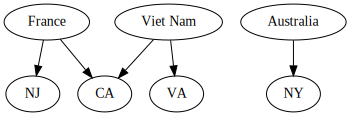

In [16]:
#q13

df["country"] = df["ip"].apply(e.lookup_region)
countries_q13 = ["Australia", "France", "Viet Nam"]
df_13 = df.loc[df['country'].isin(countries_q13)].reset_index()
g = Digraph()
country_to_state = {}
for i in range(len(df_13['country'])):
    if df_13['file names'][i] in files:
        s = files[df_13['file names'][i]].state()
        c = df_13['country'][i]
        if c not in country_to_state:
            country_to_state[c] = [s]
            g.edge(c, s)
        else:
            if s not in country_to_state[c]:
                country_to_state[c].append(s)
                g.edge(c, s)
g

In [17]:
#q14

address_dic = {}
for f in df["file names"]:
    if f in files:
        addr = files[f].addresses
        for a in addr:
            if a not in address_dic:
                address_dic[a] = 0
            address_dic[a] += 1

# Got which values are greater than 250 from following website            
# https://stackoverflow.com/questions/18807079/selecting-elements-of-a-python-dictionary-greater-than-a-certain-value
address_dic_250 = {k:v for (k,v) in address_dic.items() if v >= 225}
dict(sorted(address_dic_250.items(), key=lambda x: x[1], reverse = True))

{'801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102': 720,
 '801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102\n817-334-4100': 464,
 '1114 AVENUE OF THE AMERICAS\n29TH FLOOR\nNEW YORK NY 10036': 356,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104': 305,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383': 289,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383\n425-442-0931': 289,
 '1881 GROVE AVENUE\nRADFORD VA 24141': 277,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104\n3125066500': 264,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020': 225,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020\n212-956-2221': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3\n604-683-6332': 225}

(20.0, 50.0)

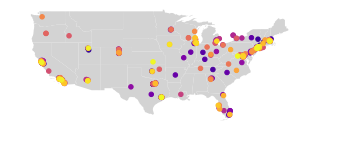

In [18]:
#q15

with open('locations.geojson') as json_file:
    data = json.load(json_file)
data = pd.DataFrame(data['features'])
world = geopandas.read_file('shapes/cb_2018_us_state_20m.shp')

new_address = []
longitude = []
latitude = []
for i in range(len(data)):
    new_address.append(data["properties"][i]['address'])
    longitude.append(data["geometry"][i]["coordinates"][0])
    latitude.append(data["geometry"][i]["coordinates"][1])
data['new_address'] = pd.Series(new_address)
data['longitude'] = pd.Series(longitude)
data['latitude'] = pd.Series(latitude)

gdf = geopandas.GeoDataFrame(
    data, geometry=geopandas.points_from_xy(data["longitude"], data["latitude"]))

gdf = gdf[['geometry','new_address']]

counts = []
for i in gdf['new_address']:
    counts.append(address_dic[i])
gdf['counts'] = pd.Series(counts)

ax = world.plot(color = "lightgray")
#ax.set_xlim(-130, -55)
#ax.set_ylim(20, 50)
#ax = us.plot(color = "lightgray", edgecolor="0.8", figsize=(8,8))
#gdf['geometry'].plot(ax=ax, color="black", markersize=3)
gdf['geometry'].plot(ax=ax, c = "cmap", cmap = "plasma", markersize=20)
ax.set_axis_off()
#df.plot.scatter(ax = ax, x='exit_velocity_avg',y='launch_angle_avg',c='DarkBlue', title = "exit velocity vs. launch angle")

ax.set_xlim(-130, -55)
ax.set_ylim(20, 50)